<h1>目录<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#导包" data-toc-modified-id="导包-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>导包</a></span></li><li><span><a href="#载入数据集" data-toc-modified-id="载入数据集-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>载入数据集</a></span></li><li><span><a href="#将数字矩阵转换成图像进行观察" data-toc-modified-id="将数字矩阵转换成图像进行观察-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>将数字矩阵转换成图像进行观察</a></span></li><li><span><a href="#拆分训练集和测试集" data-toc-modified-id="拆分训练集和测试集-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>拆分训练集和测试集</a></span></li><li><span><a href="#建立朴素贝叶斯模型" data-toc-modified-id="建立朴素贝叶斯模型-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>建立朴素贝叶斯模型</a></span><ul class="toc-item"><li><span><a href="#模型评估" data-toc-modified-id="模型评估-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>模型评估</a></span></li><li><span><a href="#采用学习曲线" data-toc-modified-id="采用学习曲线-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>采用学习曲线</a></span></li></ul></li><li><span><a href="#对剩下的两个模型也进行学习曲线绘制" data-toc-modified-id="对剩下的两个模型也进行学习曲线绘制-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>对剩下的两个模型也进行学习曲线绘制</a></span><ul class="toc-item"><li><span><a href="#多项式贝叶斯调参" data-toc-modified-id="多项式贝叶斯调参-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>多项式贝叶斯调参</a></span></li><li><span><a href="#高斯朴素贝叶斯调参" data-toc-modified-id="高斯朴素贝叶斯调参-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>高斯朴素贝叶斯调参</a></span></li></ul></li><li><span><a href="#得到结论:-高斯朴素贝叶斯在数据集中表现的最高" data-toc-modified-id="得到结论:-高斯朴素贝叶斯在数据集中表现的最高-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>得到结论: 高斯朴素贝叶斯在数据集中表现的最高</a></span></li><li><span><a href="#绘制混淆矩阵观察分类结果" data-toc-modified-id="绘制混淆矩阵观察分类结果-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>绘制混淆矩阵观察分类结果</a></span></li></ul></div>

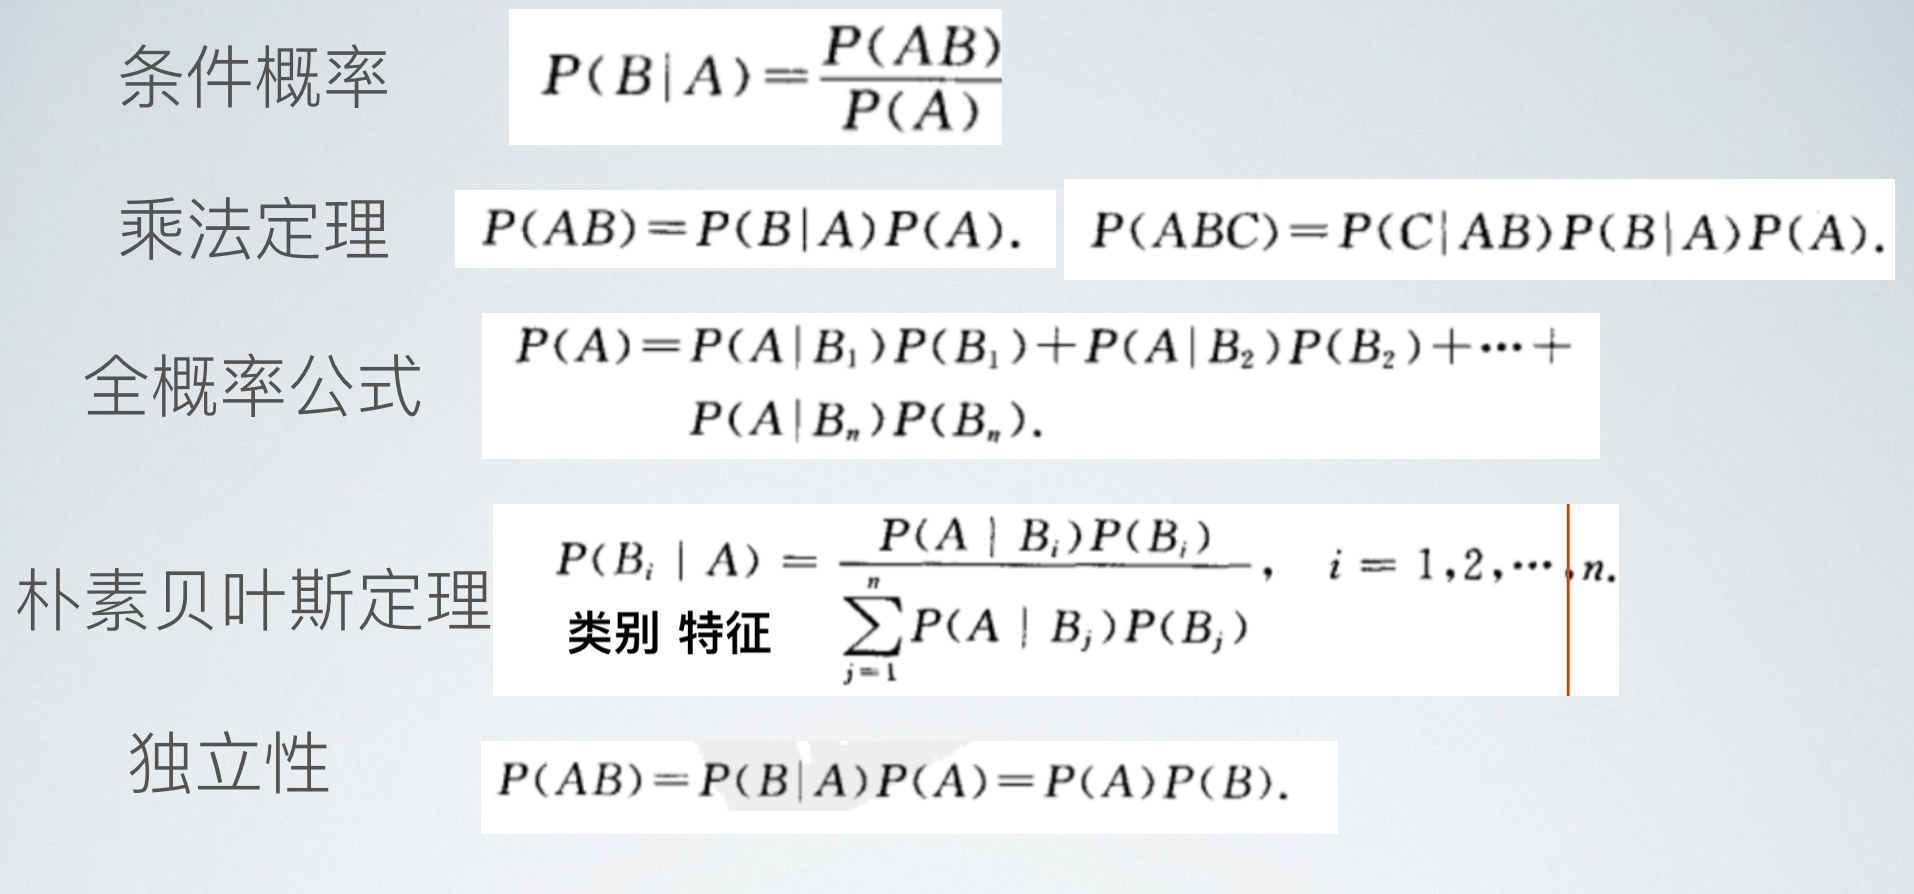

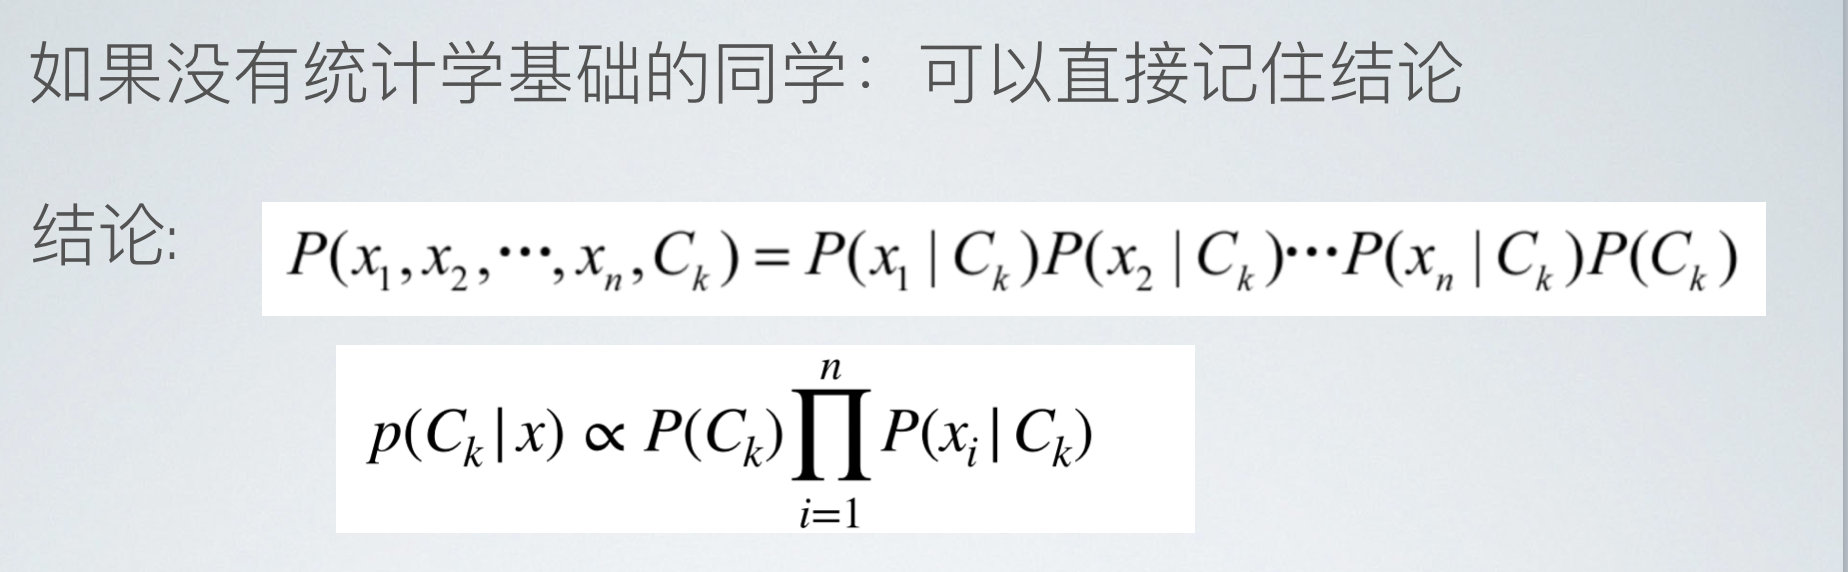

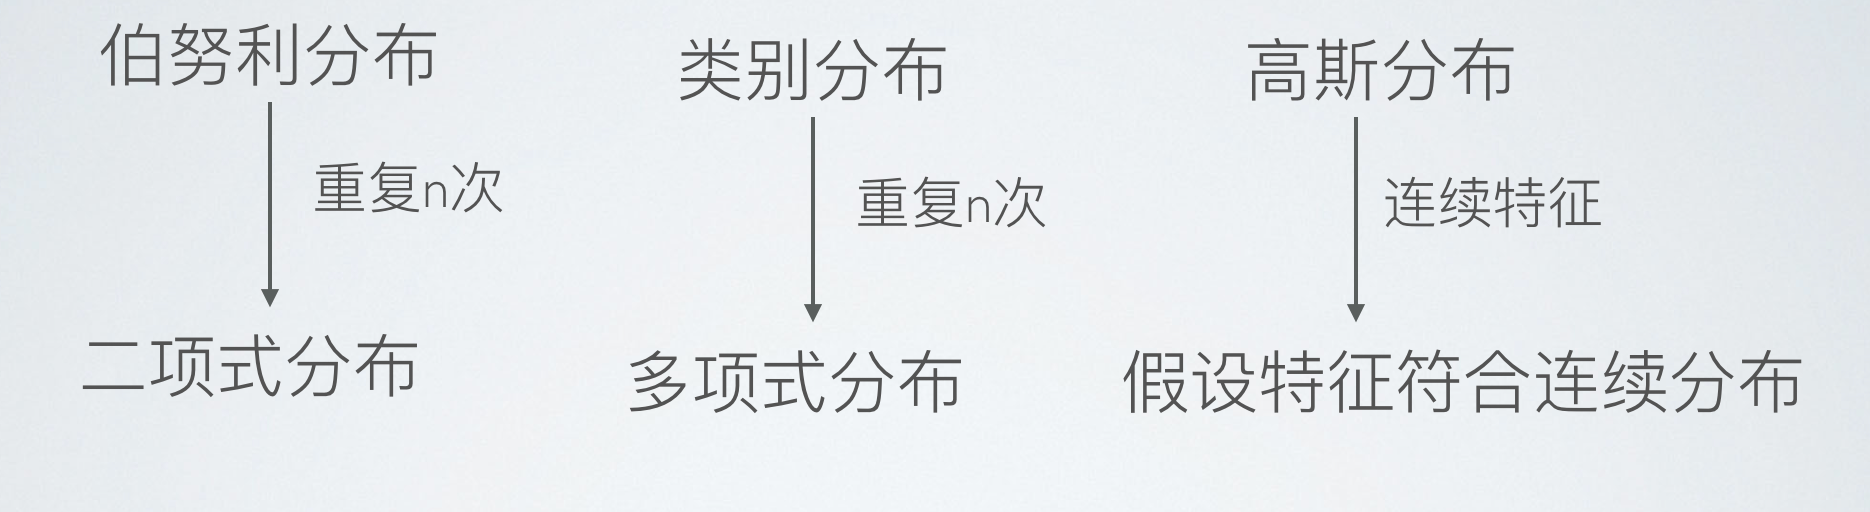

sklearn.naive_bayes.BernoulliNB  伯努利朴素贝叶斯,二项式分布

sklearn.naive_bayes.MultinomialNB 多项式朴素贝叶斯

sklearn.naive_bayes.GaussianNB 高斯朴素贝叶斯

# 在scikt-learn中使用朴素贝叶斯

## 导包

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.naive_bayes import BernoulliNB # 伯努利
from sklearn.naive_bayes import MultinomialNB # 多项式
from sklearn.naive_bayes import GaussianNB # 高斯朴素贝叶斯

from sklearn.datasets import load_digits # datasets 数据集, load_digits 手写数字数据集

from sklearn.model_selection import train_test_split # 切分训练集和测试集


/Users/mac/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/mac/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/mac/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


## 载入数据集

In [2]:
# 固定语法, 调用函数, 获取到数据集相关内容
digits = load_digits()

In [4]:
type(digits) # 所有数据集相关内容,都在这里面封装

sklearn.utils.Bunch

In [5]:
# 如何查看里面都封装了哪些东西呢?
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [6]:
# DESCR  describe
# 查看数据简介
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [9]:
# images 里面封装的是原始图像数据 
digits.images.shape

(1797, 8, 8)

In [10]:
# 看第一张图像的数据
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [12]:
digits.data.shape # 将原始二维数据拉平之后的数据集

(1797, 64)

In [13]:
digits.data[0] # 训练用的数据,每个样本是1维的, 就是将上面的images展开成一维

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [15]:
# 分类的类别都有哪些
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [18]:
# 1797个样本,的真实分类分别是哪一个类别
digits.target.shape

(1797,)

In [25]:
# 第一个手写数字真实值是 0 
digits.target[0]

0

## 将数字矩阵转换成图像进行观察

该图像的真实标签为: 7


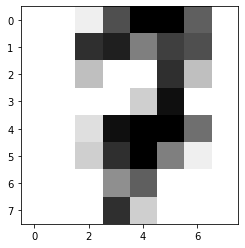

In [38]:
# Matplotlib下前面的 ,imshow 的函数, 可以将数字矩阵转换成图像
# cmap color  map 颜色映射 , binary 代表黑白图像
index = 300 # 查看第多少张图像
plt.imshow(digits.images[index] , cmap = 'binary')
print('该图像的真实标签为:', digits.target[index])

## 拆分训练集和测试集

In [39]:
# 固定步骤
X = digits.data
y = digits.target

In [40]:
# 标准步骤
X_train , X_test , y_train , y_test = train_test_split(X,y , 
            test_size =0.3,random_state = 666)

## 建立朴素贝叶斯模型


同时建立三个模型,比较一下三个模型在这个数据集上面的一个表现情况.

In [41]:
# 实例化模型 ,将一个类实例化成具体的一个对象
bnb = BernoulliNB() # 不填参数, 使用参数的默认值
mnb = MultinomialNB()
gnb = GaussianNB()

In [42]:
# 刚实例化的时候,模型相当于一个空的架子
# fit 结束之后, 相当于模型已经学习到了对应的参数值, 
# 这个时候,就可以使用进行模型评估或者对未知数据进行预测了

# 超参数: 模型没有办法自己去进行学习的参数, 这类参数只能由人工去进行指定
# 模型参数: 模型在fit训练的过程中,会自动进行学习的参数

# 新实例化出来的一个模型,中的参数是空的
# 对三个模型同时进行训练
bnb.fit(X_train,y_train)
mnb.fit(X_train,y_train)
gnb.fit(X_train,y_train)
# 训练过程实际上就是学习参数的过程.

GaussianNB(priors=None, var_smoothing=1e-09)

### 模型评估

最常用:准确率

对于分类模型来讲, 模型下面的score接口,就是计算模型准确率.

可以评估模型在训练集上面的准确率

测试集上面的准确率

In [43]:
# 训练集准确率
print(bnb.score(X_train , y_train))
print(mnb.score(X_train , y_train))
print(gnb.score(X_train , y_train))
# 对每一个样本进行预测,然后将预测结果和真实结果比较, 看一下正确比例

0.8647573587907716
0.9029435163086714
0.8687350835322196


In [44]:
# 测试集准确率
# 模型在训练过程中是没有接触过这些数据的, 所以可以当做是未知数据
# 真正有意义的准确率, 评估的是模型的泛化性能
print(bnb.score(X_test , y_test))
print(mnb.score(X_test , y_test))
print(gnb.score(X_test , y_test))

0.8592592592592593
0.9166666666666666
0.8555555555555555


In [ ]:
# 过拟合: 模型过多的学习到了训练数据集中的信息(可以泛化的规律, 还有噪声), 模型即学习到了
# 数据中的规律, 又学习到了数据中的噪声.
# 规律是可以推演到未知数据中的,而噪声是个性化的.
# 结果就是对训练数据集的预测准确率非常之高.
# 但是对于未知数据预测准确率非常之低.
# 则模型处于过拟合状态

# 表现: 训练集准确率大于测试集准确率


In [45]:
# 交叉验证评估准确率
from sklearn.model_selection import cross_val_score # 交叉验证

In [49]:
# estimator, 评估器
#     X,  
#     y=None
#     scoring=None, 评估指标, 默认准确率
#     cv ,折数
cross_val_score(bnb, X_train,y_train, cv=5) # 伯努利交叉验证结

array([0.86220472, 0.84645669, 0.85258964, 0.836     , 0.85887097])

In [50]:
cross_val_score(bnb, X_train,y_train, cv=5).mean() # 求平均值

0.8512244052998067

In [51]:
cross_val_score(mnb, X_train,y_train, cv=5)

array([0.91338583, 0.87007874, 0.89641434, 0.868     , 0.91935484])

In [52]:
cross_val_score(mnb, X_train,y_train, cv=5).mean()# 求平均值

0.8934467496536586

In [53]:
cross_val_score(gnb, X_train,y_train, cv=5)

array([0.85433071, 0.78346457, 0.90438247, 0.824     , 0.84274194])

In [54]:
cross_val_score(gnb, X_train,y_train, cv=5).mean()# 求平均值

0.8417839362387888

### 采用学习曲线

学习曲线: 随着某一个参数的变化, 模型的评估指标的值的变化. 一次只能调一个参数.

In [58]:
# 调参范围
np.arange(0.001,2.001,0.001)

array([1.000e-03, 2.000e-03, 3.000e-03, ..., 1.998e+00, 1.999e+00,
       2.000e+00])

In [59]:
# 保存结果的列表
train_score = []
test_score = []
cross_score =[] # 交叉验证
# 对你想要调参的数值序列进行遍历 
# 从 1 调到 0.001 ,每次变化幅度 0.001
for i in np.arange(0.001,2.001,0.001):
    # 建立模型
    bnb = BernoulliNB(alpha=i)
    # 训练
    bnb.fit(X_train,y_train)
    # 保存分数序列
    train_score.append(bnb.score(X_train,y_train))
    test_score.append(bnb.score(X_test,y_test))
    # 交叉验证分数
    cross = cross_val_score(bnb, X_train,y_train, cv=5).mean()# 求平均值
    cross_score.append(cross)

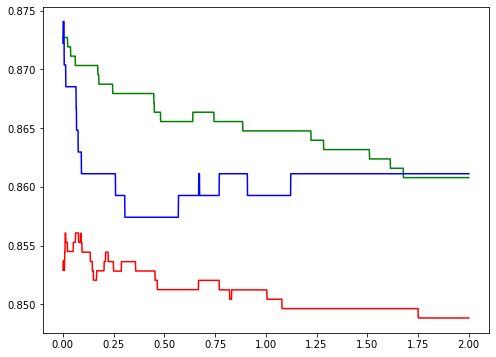

In [64]:
plt.figure(figsize=(8,6))
# 绘制学习曲线
# 分别将三个列表的数值绘制成折线图
plt.plot(np.arange(0.001,2.001,0.001),train_score, color='green')
plt.plot(np.arange(0.001,2.001,0.001),test_score, color='blue')
plt.plot(np.arange(0.001,2.001,0.001),cross_score, color='red')

In [ ]:
# 发现调参范围可以向更小的方向进行,所以对学习曲线进行一个调整
# 每次都是在上一次使用的参数基础上, 缩小10倍,进行建模
# 1 0.1  0.01 0.001 , 0.0001


In [65]:
# 每次除以10的方法
para = 1
for i in range(10):
    print(para)
    
    para /= 10 # 在原来的基础上除以10

1
0.1
0.01
0.001
0.0001
1e-05
1.0000000000000002e-06
1.0000000000000002e-07
1.0000000000000002e-08
1.0000000000000003e-09


当前参数值为: 1
当前参数值为: 0.1
当前参数值为: 0.01
当前参数值为: 0.001
当前参数值为: 0.0001
当前参数值为: 1e-05
当前参数值为: 1.0000000000000002e-06
当前参数值为: 1.0000000000000002e-07
当前参数值为: 1.0000000000000002e-08
当前参数值为: 1.0000000000000003e-09


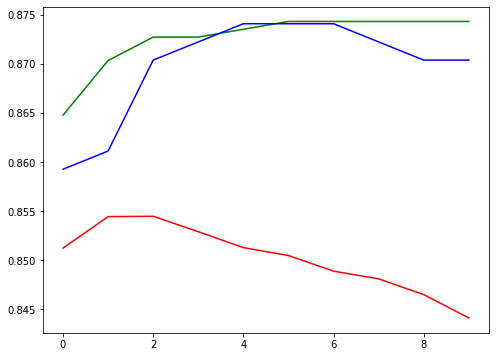

In [74]:
# 保存结果的列表
train_score = []
test_score = []
cross_score =[] # 交叉验证

para = 1
for i in range(10): # 遍历10次 , 0-9
    print('当前参数值为:' ,para)
    # 建立模型
    bnb = BernoulliNB(alpha= para)
    # 训练
    bnb.fit(X_train,y_train)
    # 保存分数序列
    train_score.append(bnb.score(X_train,y_train))
    test_score.append(bnb.score(X_test,y_test))
    # 交叉验证分数
    cross = cross_val_score(bnb, X_train,y_train, cv=5).mean()# 求平均值
    cross_score.append(cross)
    
    para /= 10 # 在原来的基础上除以10
    
    
plt.figure(figsize=(8,6))
# 绘制学习曲线
# 分别将三个列表的数值绘制成折线图
plt.plot(train_score, color='green') # 如果你不传入x,只传入y, 那么x就是用默认的0,1,2...
plt.plot(test_score, color='blue')
plt.plot(cross_score, color='red')

In [69]:
# 我们认为交叉验证结果是更加可信的
# 取交叉验证最高的位置
cross_score

[0.8512244052998067,
 0.854434121274617,
 0.8544722213508174,
 0.8528976458909094,
 0.8512817831038053,
 0.8504723719296046,
 0.8488849703548013,
 0.8480975687799981,
 0.8464975687799982,
 0.844116541707187]

In [70]:
# 找出最大值
max(cross_score)

0.8544722213508174

In [72]:
# 找出最大值所对应的索引值
np.argmax(cross_score)
# 索引2 对应的 拉普拉斯平滑参数 0.01

2

## 对剩下的两个模型也进行学习曲线绘制

找出最高的参数值,以及对应的准确率,然后比较三个模型,哪一个在本数据集上面表现的最好

### 多项式贝叶斯调参

当前参数值为: 1
当前参数值为: 0.1
当前参数值为: 0.01
当前参数值为: 0.001
当前参数值为: 0.0001
当前参数值为: 1e-05
当前参数值为: 1.0000000000000002e-06
当前参数值为: 1.0000000000000002e-07
当前参数值为: 1.0000000000000002e-08
当前参数值为: 1.0000000000000003e-09


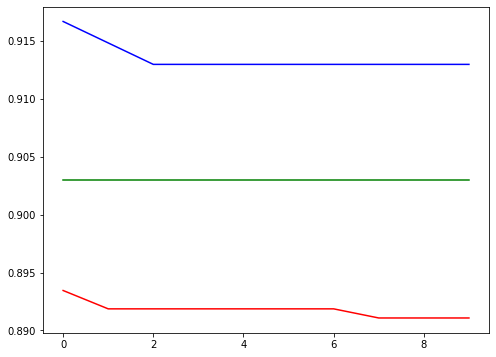

In [75]:
# 保存结果的列表
train_score = []
test_score = []
cross_score =[] # 交叉验证

para = 1
for i in range(10): # 遍历10次 , 0-9
    print('当前参数值为:' ,para)
    # 建立模型
    mnb= MultinomialNB(alpha= para)
    # 训练
    mnb.fit(X_train,y_train)
    # 保存分数序列
    train_score.append(mnb.score(X_train,y_train))
    test_score.append(mnb.score(X_test,y_test))
    # 交叉验证分数
    cross = cross_val_score(mnb, X_train,y_train, cv=5).mean()# 求平均值
    cross_score.append(cross)
    
    para /= 10 # 在原来的基础上除以10
    
    
plt.figure(figsize=(8,6))
# 绘制学习曲线
# 分别将三个列表的数值绘制成折线图
plt.plot(train_score, color='green') # 如果你不传入x,只传入y, 那么x就是用默认的0,1,2...
plt.plot(test_score, color='blue')
plt.plot(cross_score, color='red')

当前参数值为: 10
当前参数值为: 5.0
当前参数值为: 2.5
当前参数值为: 1.25
当前参数值为: 0.625
当前参数值为: 0.3125
当前参数值为: 0.15625
当前参数值为: 0.078125
当前参数值为: 0.0390625
当前参数值为: 0.01953125
当前参数值为: 0.009765625
当前参数值为: 0.0048828125
当前参数值为: 0.00244140625
当前参数值为: 0.001220703125
当前参数值为: 0.0006103515625
当前参数值为: 0.00030517578125
当前参数值为: 0.000152587890625
当前参数值为: 7.62939453125e-05
当前参数值为: 3.814697265625e-05
当前参数值为: 1.9073486328125e-05


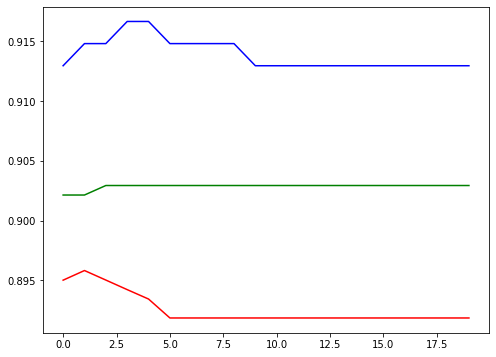

In [77]:
# 保存结果的列表
train_score = []
test_score = []
cross_score =[] # 交叉验证

para = 10
for i in range(20): # 遍历10次 , 0-9
    print('当前参数值为:' ,para)
    # 建立模型
    mnb= MultinomialNB(alpha= para)
    # 训练
    mnb.fit(X_train,y_train)
    # 保存分数序列
    train_score.append(mnb.score(X_train,y_train))
    test_score.append(mnb.score(X_test,y_test))
    # 交叉验证分数
    cross = cross_val_score(mnb, X_train,y_train, cv=5).mean()# 求平均值
    cross_score.append(cross)
    
    para /= 2 # 在原来的基础上除以10
    
    
plt.figure(figsize=(8,6))
# 绘制学习曲线
# 分别将三个列表的数值绘制成折线图
plt.plot(train_score, color='green') # 如果你不传入x,只传入y, 那么x就是用默认的0,1,2...
plt.plot(test_score, color='blue')
plt.plot(cross_score, color='red')

In [79]:
# 多项式最高分数
max(cross_score)

0.8958311916671642

In [80]:
# 对应索引为1
np.argmax(cross_score)

1

In [ ]:
# 拉平拉斯取5的时候, 效果最好,达到 0.89

### 高斯朴素贝叶斯调参

当前参数值为: 10
当前参数值为: 1.0
当前参数值为: 0.1
当前参数值为: 0.01
当前参数值为: 0.001
当前参数值为: 0.0001
当前参数值为: 1e-05
当前参数值为: 1.0000000000000002e-06
当前参数值为: 1.0000000000000002e-07
当前参数值为: 1.0000000000000002e-08
当前参数值为: 1.0000000000000003e-09
当前参数值为: 1.0000000000000003e-10
当前参数值为: 1.0000000000000003e-11
当前参数值为: 1.0000000000000002e-12
当前参数值为: 1.0000000000000002e-13
当前参数值为: 1.0000000000000002e-14
当前参数值为: 1e-15
当前参数值为: 1.0000000000000001e-16
当前参数值为: 1e-17
当前参数值为: 1e-18


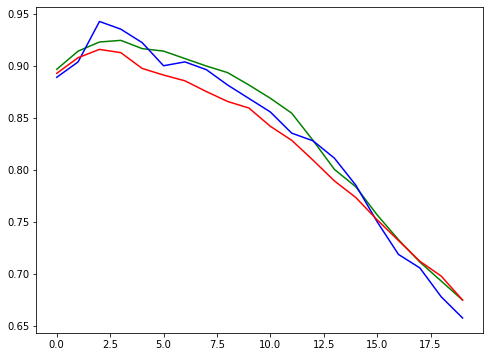

In [84]:
# 保存结果的列表
train_score = []
test_score = []
cross_score =[] # 交叉验证

para = 10
for i in range(20): # 遍历10次 , 0-9
    print('当前参数值为:' ,para)
    # 建立模型
    gnb= GaussianNB(var_smoothing = para)
    # 训练
    gnb.fit(X_train,y_train)
    # 保存分数序列
    train_score.append(gnb.score(X_train,y_train))
    test_score.append(gnb.score(X_test,y_test))
    # 交叉验证分数
    cross = cross_val_score(gnb, X_train,y_train, cv=5).mean()# 求平均值
    cross_score.append(cross)
    
    para /= 10 # 在原来的基础上除以10
    
    
plt.figure(figsize=(8,6))
# 绘制学习曲线
# 分别将三个列表的数值绘制成折线图
plt.plot(train_score, color='green') # 如果你不传入x,只传入y, 那么x就是用默认的0,1,2...
plt.plot(test_score, color='blue')
plt.plot(cross_score, color='red')

In [85]:
# 查看交叉验证分数最大值
max(cross_score)

0.9157336722705317

In [87]:
# 查看索引
np.argmax(cross_score)

2

In [ ]:
# 发现遍历中的第3次中分数最高, 第三次的参数值为0.1 , 所以0.1为最好的参数
# 准确率0.9157

## 得到结论: 高斯朴素贝叶斯在数据集中表现的最高

交叉验证分数能够达到0.9157 , 对应参数值为0.1

In [88]:
# 采用这个参数重新建模
gnb_final = GaussianNB(var_smoothing=0.1)

In [89]:
gnb_final.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=0.1)

In [90]:
gnb_final.score(X_test, y_test)

0.9425925925925925

In [95]:
# 交叉验证的分数结果
cross_val_score(gnb_final ,X_train,y_train,cv= 5).mean()

0.9157336722705317

## 绘制混淆矩阵观察分类结果

多分类也可以绘制混淆矩阵

In [96]:
# 导入混淆矩阵
from sklearn.metrics import confusion_matrix

In [97]:
# 对数据进行预测
y_pred = gnb_final.predict(X_test)
y_pred

array([8, 1, 3, 4, 4, 0, 7, 0, 8, 0, 4, 6, 1, 1, 2, 0, 1, 6, 7, 3, 2, 6,
       5, 2, 3, 4, 0, 2, 0, 3, 0, 8, 7, 2, 3, 5, 1, 3, 1, 5, 8, 6, 2, 6,
       3, 1, 3, 0, 0, 4, 9, 9, 2, 8, 7, 0, 5, 4, 0, 9, 5, 5, 8, 7, 4, 2,
       8, 8, 7, 5, 4, 3, 0, 2, 7, 2, 1, 2, 4, 0, 9, 0, 6, 6, 2, 0, 0, 5,
       4, 4, 3, 1, 3, 8, 6, 4, 4, 7, 5, 6, 8, 4, 8, 4, 6, 9, 7, 7, 0, 8,
       8, 3, 9, 7, 1, 8, 4, 2, 7, 0, 0, 4, 9, 6, 7, 9, 4, 6, 4, 8, 4, 7,
       2, 6, 9, 5, 8, 7, 2, 5, 5, 9, 7, 3, 9, 8, 9, 4, 4, 8, 5, 1, 6, 4,
       4, 8, 9, 6, 2, 5, 2, 1, 4, 4, 3, 9, 4, 0, 6, 0, 8, 3, 8, 7, 3, 0,
       8, 0, 5, 9, 2, 7, 1, 8, 2, 4, 3, 3, 7, 8, 2, 7, 2, 2, 8, 0, 5, 7,
       6, 7, 3, 4, 7, 1, 7, 0, 9, 2, 8, 9, 3, 8, 9, 1, 1, 8, 9, 8, 7, 0,
       3, 7, 3, 3, 4, 8, 2, 1, 8, 6, 0, 1, 7, 7, 5, 8, 3, 8, 7, 6, 8, 4,
       2, 6, 8, 8, 7, 4, 9, 3, 5, 0, 6, 3, 8, 3, 3, 1, 4, 5, 3, 2, 5, 6,
       9, 6, 9, 5, 5, 3, 6, 5, 9, 3, 7, 7, 0, 8, 8, 9, 9, 9, 2, 5, 6, 1,
       9, 6, 9, 7, 7, 4, 5, 0, 0, 5, 3, 8, 4, 4, 3,

In [98]:
# 评估测试集的混淆矩阵
# 需要有测试集的真实标签, 和模型预测标签
# y_test
confusion_matrix(y_test , y_pred)

array([[58,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 41,  1,  0,  0,  1,  0,  0,  3,  3],
       [ 0,  0, 50,  0,  0,  0,  0,  0,  3,  0],
       [ 0,  0,  1, 52,  0,  1,  0,  1,  4,  2],
       [ 0,  1,  0,  0, 53,  0,  0,  1,  1,  0],
       [ 0,  0,  0,  1,  0, 51,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 47,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 52,  0,  0],
       [ 0,  1,  1,  0,  0,  0,  0,  1, 54,  0],
       [ 0,  0,  0,  3,  0,  0,  0,  1,  0, 51]])

In [ ]:
# 矩阵中数字比较多, 将其可视化出来看起来比较方便

In [99]:
con = confusion_matrix(y_test , y_pred)

In [100]:
# 使用seaborn 包中的heatmap 热力图进行绘制
import seaborn as sns

/Users/mac/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


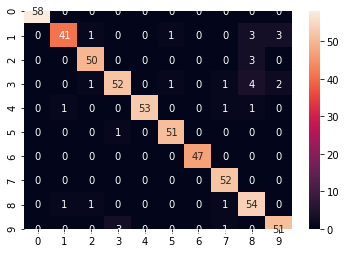

In [103]:
# annot  设置为True ,则会将具体的数字显示在对应的格子上面
sns.heatmap(con ,annot=True)

In [104]:
from sklearn.metrics import recall_score

In [109]:
# 10个类别综合加权计算的召回率
recall_score(y_test ,y_pred,average='weighted')

0.9425925925925925

In [110]:
from sklearn.metrics import classification_report

In [112]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       0.95      0.84      0.89        49
           2       0.94      0.94      0.94        53
           3       0.93      0.85      0.89        61
           4       1.00      0.95      0.97        56
           5       0.96      0.98      0.97        52
           6       1.00      1.00      1.00        47
           7       0.93      1.00      0.96        52
           8       0.83      0.95      0.89        57
           9       0.91      0.93      0.92        55

    accuracy                           0.94       540
   macro avg       0.95      0.94      0.94       540
weighted avg       0.94      0.94      0.94       540

